# 군집화
## K-평균 군집화
> 선택된 포인트의 평균지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균지점으로 이동하는 프로세스를 반복 수행

>>장점: 알고리즘이 쉽고 간결

>> 단점: 속성의 개수가 많을 수록 군집화의 정확도가 떨어짐
          반복 횟수가 많을 경우 수행시간이 느려짐
          몇개의 군집을 선택해야할 지 가이드하기 어려움
>>

In [1]:
class sklearn.cluster.KMeans(n_cluster=8,init='k-means++',n_init=10,max_iter=300,
                            tol=0.0001,precompute_distance='auto',verbose=0,random_state=None,
                            copy_x=True,n_jobs=1,alogorithm='auto')

SyntaxError: invalid syntax (2329191701.py, line 1)

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)
irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


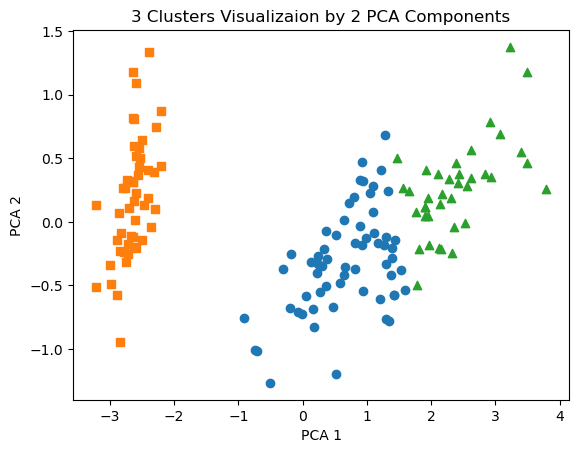

In [9]:
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualizaion by 2 PCA Components')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [11]:
import pandas as pd
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


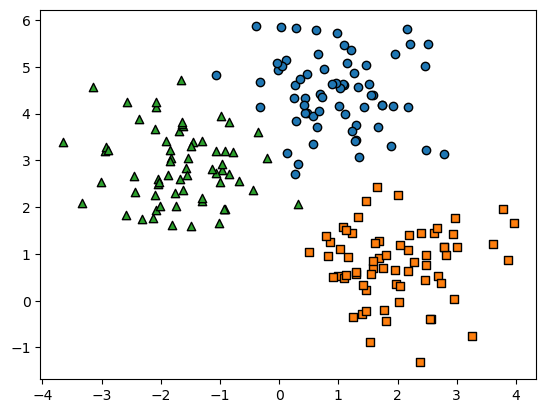

In [12]:
target_list=np.unique(y)
markers=['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target list는 0,1,2
for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',
               marker=markers[target])
plt.show()

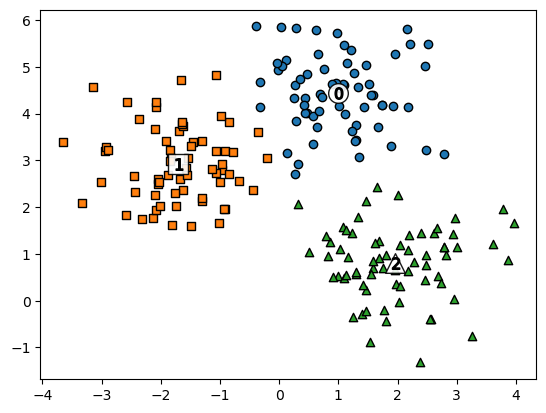

In [14]:
# KMeans 객체를 이용해 X 데이터를 KMeans 클러스터링 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels
# 중심 위치 시각화
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
               alpha=0.9,edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)
plt.show()


In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 군집 평가
## 실루엣 분석

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
%matplotlib inline
iris = load_iris()
feature_names = ['sepal length','sepal_width' ,'petal_length', 'petal _width']
irisDF = pd. DataFrame (data=iris .data, columns=feature_names)
kmeans = KMeans (n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_
# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 71°| shape', score_samples. shape)
# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']= score_samples
# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print( '붓꽃 데이터 세트 Silhouette Analysis Score: {0: 3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 71°| shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:  0.552819


,sepal length,sepal_width,petal_length,petal _width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [33]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [35]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

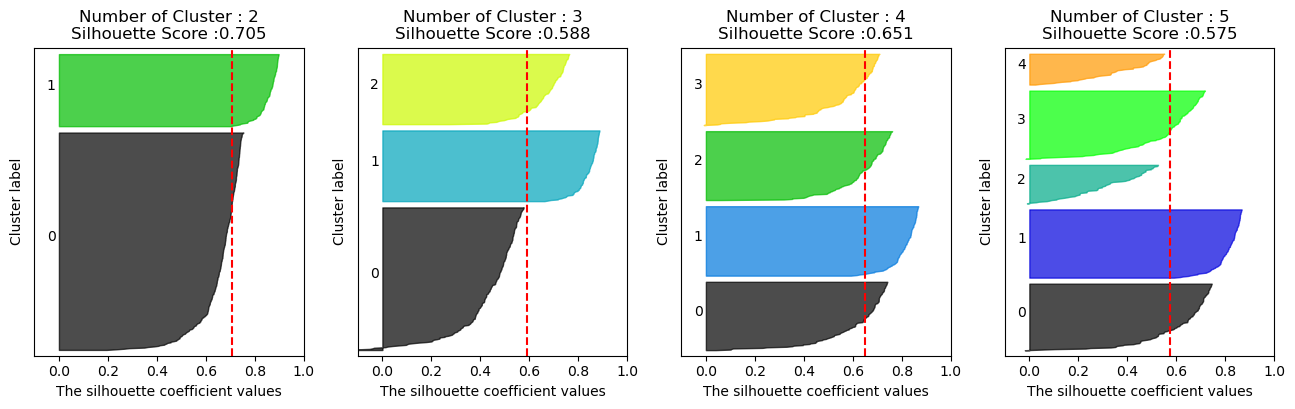

In [36]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10,10),shuffle=True,random_state=1)
visualize_silhouette([2,3,4,5],X)

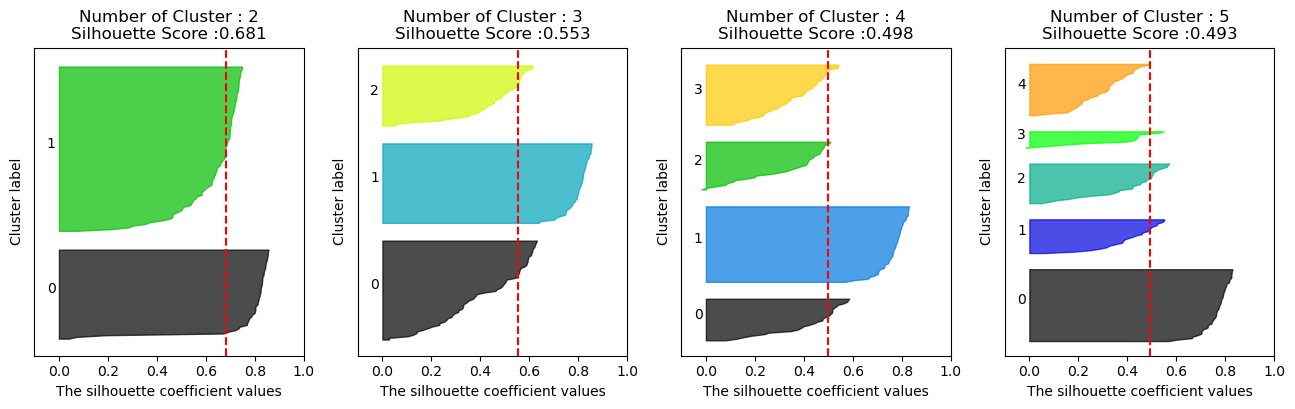

In [37]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

## 평균이동

: 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴

In [38]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)
meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형',np.unique(cluster_labels))

cluster labels 유형 [0 1 2 3 4 5]


In [39]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형',np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


In [40]:
from sklearn.cluster import estimate_bandwidth
bandwidth=estimate_bandwidth(X)
print('bandwidth 값',round(bandwidth,3))

bandwidth 값 1.816


In [42]:
import pandas as pd
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
best_bandwidth=estimate_bandwidth(X)
meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형',np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


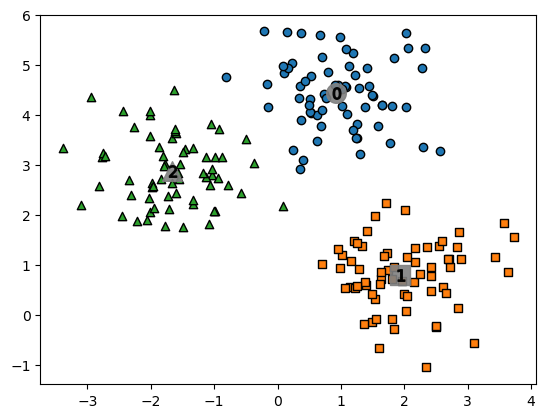

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',alpha=0.9,marker='$%d$'%label)

In [44]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# GMM (Gaussain Mixture Model)

> 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 수행

> 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정

In [45]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [46]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [49]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


## GMM K-평균 비교

In [51]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

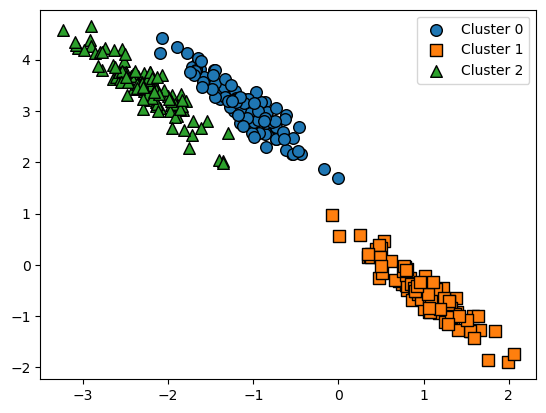

In [52]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)
transformation=[[0.688,-0.637],[-0.409,0.852]]
X_aniso=np.dot(X,transformation)
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

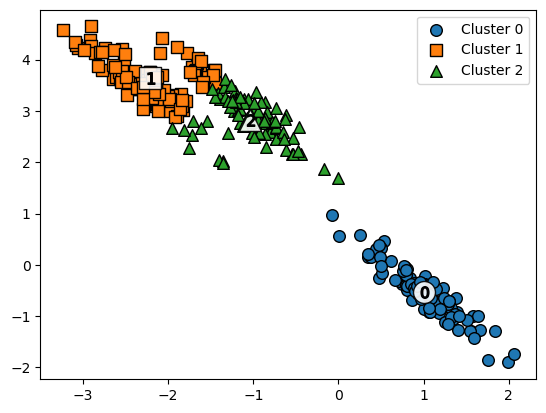

In [54]:
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label')

## KMeans 군집화

> 평균 거리 기반으로 군집화를 수행하므로 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음


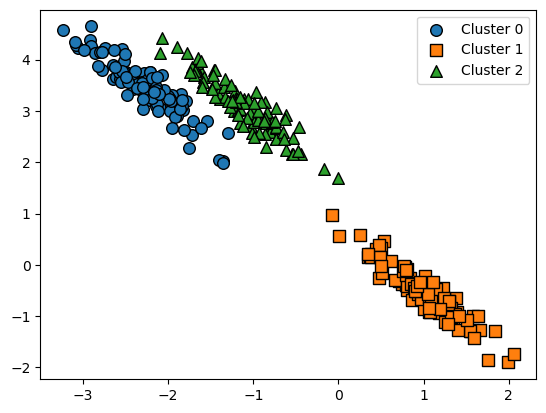

In [57]:
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

## GMM 군집화

> 군집 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 시각화 되지 않음

> 데이터가 분포된 방향에 따라 정확하게 군집화됨

In [58]:
print('KMeans Clustering')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('Gaussian Mixture Clustering')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

KMeans Clustering
target  kmeans_label
0       2                76
        1                24
1       0               100
2       1                89
        2                11
Name: kmeans_label, dtype: int64
Gaussian Mixture Clustering
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# DBSCAN 
> 밀도 기반 군집화 >> 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화 수행 가능

In [60]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


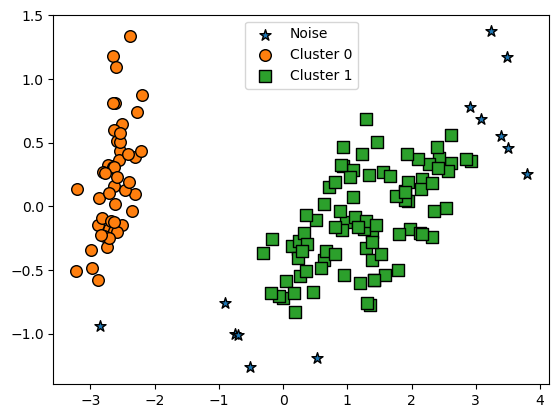

In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


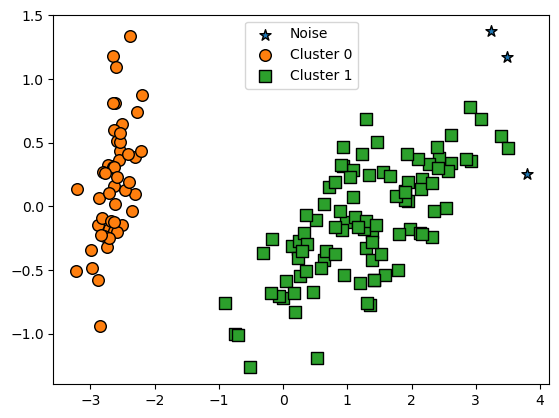

In [62]:
# eps 증가시켜서 노이즈 데이터 개수 줄이기
dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


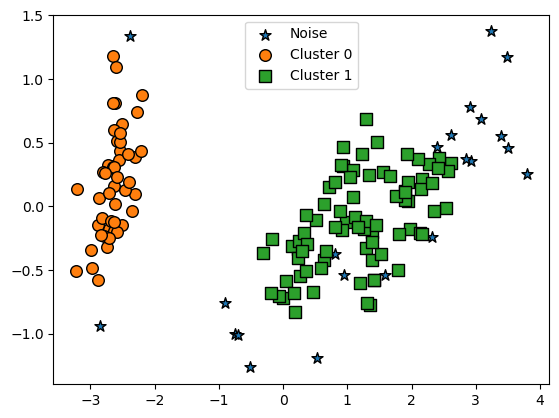

In [64]:
# min_samples 늘리면 노이즈 데이터 개수 증가
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

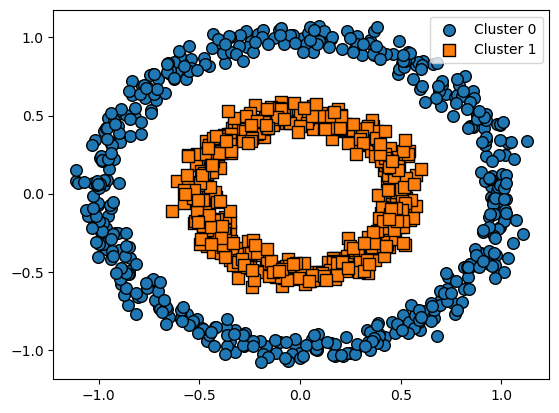

In [66]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

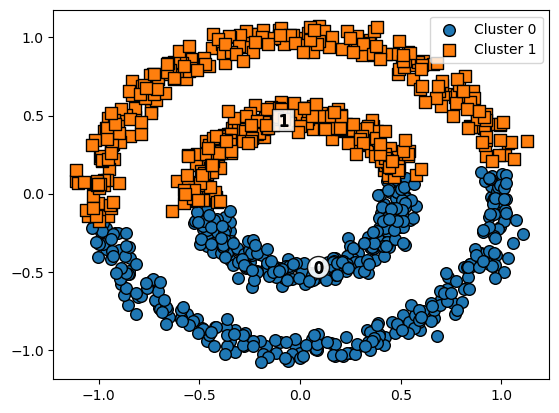

In [68]:
# KMeans로 군집화 수행
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels
visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter=True)

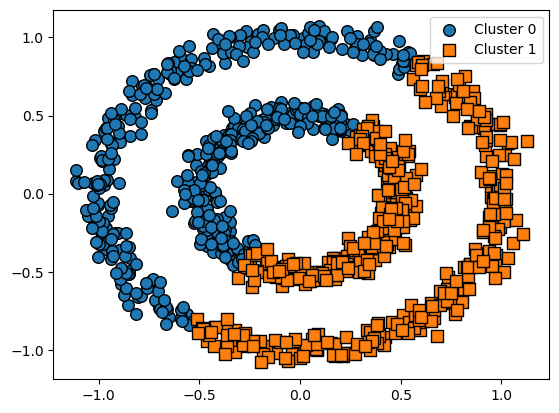

In [70]:
# GMM로 군집화 수행
gmm=GaussianMixture(n_components=2,random_state=0)
gmm_labels=gmm.fit_predict(X)
clusterDF['gmm_cluster']=gmm_labels
visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

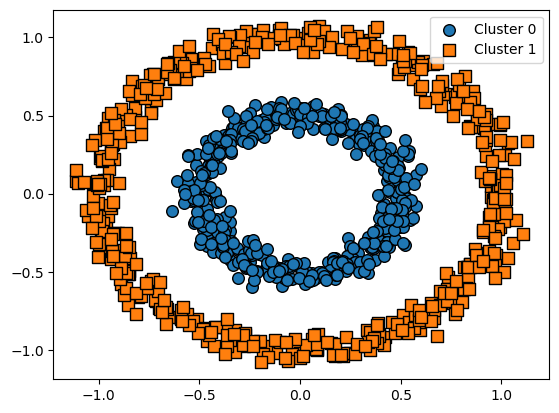

In [72]:
# DBSCAN로 군집화 수행
dbscan=DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)